# Importing Liabraries & Dataset For Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Data Insights

In [4]:
df.head()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm,species
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica
150,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(151, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_len_cm    150 non-null    float64
 1   sepal_width_cm  150 non-null    float64
 2   petal_len_cm    150 non-null    float64
 3   petal_width_cm  150 non-null    float64
 4   species         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.describe()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

sepal_len_cm      1
sepal_width_cm    1
petal_len_cm      1
petal_width_cm    1
species           1
dtype: int64

In [10]:
df.dropna(inplace= True)

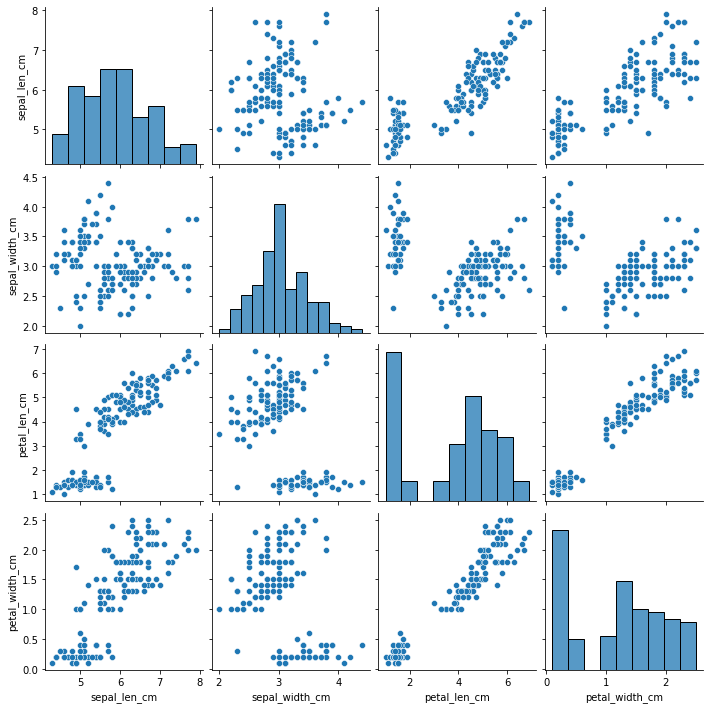

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm
sepal_len_cm,1.000000,-0.109369,0.871754,0.817954
sepal_width_cm,-0.109369,1.000000,-0.420516,-0.356544
petal_len_cm,0.871754,-0.420516,1.000000,0.962757
petal_width_cm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

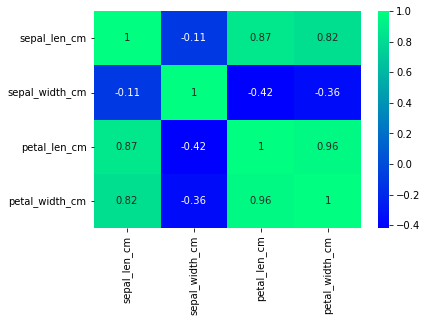

In [13]:
sns.heatmap(df.corr(), annot=True, cmap='winter')

In [14]:
df.dtypes

sepal_len_cm      float64
sepal_width_cm    float64
petal_len_cm      float64
petal_width_cm    float64
species            object
dtype: object

## Splitting Data into training & testing

In [15]:
x = df.drop(columns={'species'})
y = df.species

In [16]:
x

,sepal_len_cm,sepal_width_cm,petal_len_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

# Model Building

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics
from sklearn import tree

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [20]:
dt = DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)

In [21]:
y_ped = dt.predict(x_test)

In [22]:
conf_mat = confusion_matrix(y_test, y_ped)
class_rep = classification_report(y_test, y_ped)
accuracy = accuracy_score(y_test, y_ped)

In [23]:
print("Confusion Matrix")
print(conf_mat)
print(">>>>>>>>>>>>>>>>>>>>>>" * 5)
print("Classification Report")
print(class_rep)
print(">>>>>>>>>>>>>>>>>>>>>>" * 5)
print("Accuracy Score")
print(accuracy)
print(">>>>>>>>>>>>>>>>>>>>>>" * 5)

Confusion Matrix
[[10  0  0]
 [ 0  6  0]
 [ 0  1 13]]
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.93      0.96        14

       accuracy                           0.97        30
      macro avg       0.95      0.98      0.96        30
   weighted avg       0.97      0.97      0.97        30

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Accuracy Score
0.9666666666666667
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


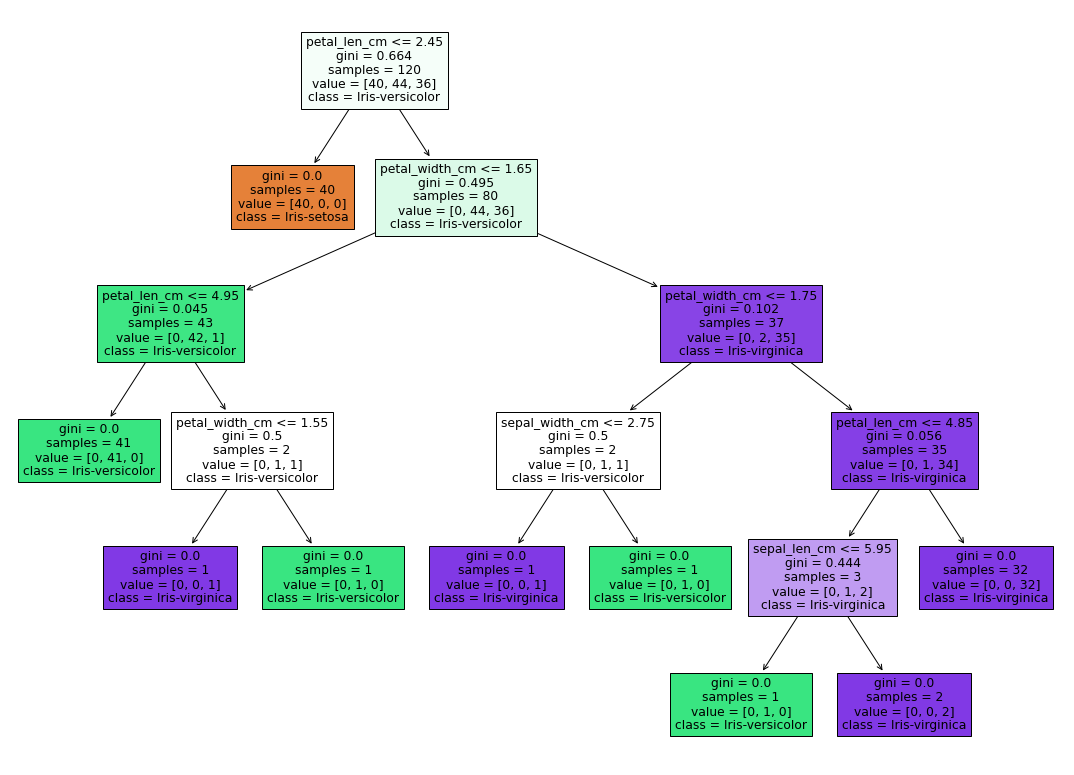

In [24]:
features = df.columns[:-1]
classes = df['species'].unique().tolist()

from sklearn.tree import plot_tree

plt.figure(figsize=(19,14))
plot_tree(dt, feature_names= features, class_names= classes, filled=True)
plt.show()